In [1]:
                                                     # Capstone Project - 1 # 

                           #Predicting Property Prices in a Specific Location Using Machine Learning #

In [2]:
# Importing Important libraries to start the project and to upload the Dataset #

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn .impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris 
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from scipy import stats
from sklearn.utils.metadata_routing import MetadataRouter
from sklearn.utils import Tags
from category_encoders import TargetEncoder
import joblib
from xgboost import XGBRegressor





In [4]:
# Uploading The Dataset Into Terminal # 

In [5]:
property_data = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\CAPSTONE PROJECTS\Property_data.csv")

In [6]:
property_data

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
# Drpoing first column #

In [8]:
property_data= property_data.drop(property_data.columns[0],axis=1)



In [9]:
property_data

,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
# Data Preprocessing # 

# Getting Info of the Dataset # 

In [11]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyClass         1460 non-null   int64  
 1   PropertyZone          1460 non-null   object 
 2   PropertyFrontage      1201 non-null   float64
 3   PropertySize          1460 non-null   int64  
 4   Street                1460 non-null   object 
 5   Alley                 91 non-null     object 
 6   PropertyShape         1460 non-null   object 
 7   Elevation             1460 non-null   object 
 8   Amenities             1460 non-null   object 
 9   Orientation           1460 non-null   object 
 10  Grade                 1460 non-null   object 
 11  Neighborhood          1460 non-null   object 
 12  Condition1            1460 non-null   object 
 13  Condition2            1460 non-null   object 
 14  BldgType              1460 non-null   object 
 15  PropertyStyle        

In [12]:
property_data.head()

,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Handle missing values # 
missing_values = property_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

print(missing_values)

PropertyFrontage         259
Alley                   1369
ExteriorCladdingType     872
ExteriorCladdingArea       8
BsmntFinish               37
BsmntMaintenance          37
BsmntVisibility           38
BsmntFinRat1              37
BsmntFinQual1             38
Electrical                 1
QualFireplace            690
BasementType              81
BasementYrBlt             81
BasementFinish            81
BasementQual              81
BasementCond              81
PoolQC                  1453
BoundaryFeatures        1179
AddFeatures             1406
dtype: int64


In [15]:
# Decribe the Dataset # 
property_data.describe()

,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:


# Handle missing values using mean for numerical and most frequent for categorical
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Identify categorical & numerical columns In The Dataset # 
categorical_cols = property_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = property_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply imputers #
property_data[numerical_cols] = num_imputer.fit_transform(property_data[numerical_cols])
property_data[categorical_cols] = cat_imputer.fit_transform(property_data[categorical_cols])

In [17]:
print (categorical_cols)
print (numerical_cols)

['PropertyZone', 'Street', 'Alley', 'PropertyShape', 'Elevation', 'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'PropertyStyle', 'RoofStyle', 'RoofMatl', 'Roof1Material', 'Roof2Material', 'ExteriorCladdingType', 'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinQual1', 'Heating', 'HeatingEfficiency', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'QualFireplace', 'BasementType', 'BasementFinish', 'BasementQual', 'BasementCond', 'PavedDrive', 'PoolQC', 'BoundaryFeatures', 'AddFeatures', 'SaleType', 'SaleCondn']
['PropertyClass', 'PropertyFrontage', 'PropertySize', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExteriorCladdingArea', 'BsmntFinSty1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'CntRmsUpLev', 'CntFir

In [18]:
# Use Of Label Encoding For Catogorical Columns # 

In [19]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    property_data[col] = le.fit_transform(property_data[col])
    label_encoders[col] = le

In [20]:
missing_values = property_data.isnull().sum()


In [21]:
missing_values

PropertyClass       0
PropertyZone        0
PropertyFrontage    0
PropertySize        0
Street              0
                   ..
SaleMon             0
SaleYr              0
SaleType            0
SaleCondn           0
PropPrice           0
Length: 80, dtype: int64

In [50]:
property_data

,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,60.0,3,65.0,8450.0,1,0,3,3,0,4,...,0.0,2,2,2,0.0,2.0,2008.0,8,4,208500.0
1,20.0,3,80.0,9600.0,1,0,3,3,0,2,...,0.0,2,2,2,0.0,5.0,2007.0,8,4,181500.0
2,60.0,3,68.0,11250.0,1,0,0,3,0,4,...,0.0,2,2,2,0.0,9.0,2008.0,8,4,223500.0
3,70.0,3,60.0,9550.0,1,0,0,3,0,0,...,0.0,2,2,2,0.0,2.0,2006.0,8,0,140000.0
4,60.0,3,84.0,14260.0,1,0,0,3,0,2,...,0.0,2,2,2,0.0,12.0,2008.0,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3,62.0,7917.0,1,0,3,3,0,4,...,0.0,2,2,2,0.0,8.0,2007.0,8,4,175000.0
1456,20.0,3,85.0,13175.0,1,0,3,3,0,4,...,0.0,2,2,2,0.0,2.0,2010.0,8,4,210000.0
1457,70.0,3,66.0,9042.0,1,0,3,3,0,4,...,0.0,2,0,2,2500.0,5.0,2010.0,8,4,266500.0
1458,20.0,3,68.0,9717.0,1,0,3,3,0,4,...,0.0,2,2,2,0.0,4.0,2010.0,8,4,142125.0


In [51]:
                                               # Outlier detection # 

In [52]:
Q1 = property_data['PropPrice'].quantile(0.25)
Q3 = property_data['PropPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = property_data[(property_data['PropPrice'] < lower_bound) | (property_data['PropPrice'] > upper_bound)]
print(outliers)

      PropertyClass  PropertyZone  PropertyFrontage  PropertySize  Street  \
11             60.0             3         85.000000       11924.0       1   
53             20.0             3         68.000000       50271.0       1   
58             60.0             3         66.000000       13682.0       1   
112            60.0             3         77.000000        9965.0       1   
151            20.0             3        107.000000       13891.0       1   
...             ...           ...               ...           ...     ...   
1268           50.0             3         70.049958       14100.0       1   
1353           50.0             3         56.000000       14720.0       1   
1373           20.0             3         70.049958       11400.0       1   
1388           20.0             3         42.000000       14892.0       1   
1437           20.0             3         96.000000       12444.0       1   

      Alley  PropertyShape  Elevation  Amenities  Orientation  ...  PoolAre

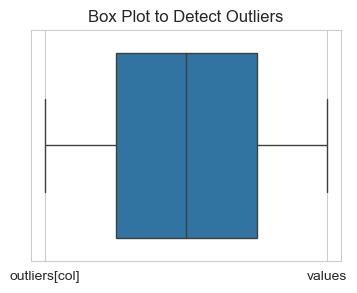

In [53]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=['outliers[col]', 'values'])
plt.title('Box Plot to Detect Outliers')
plt.show()

In [54]:
                                # Exploratory Data Analysis # 

In [55]:
# Univariate Analysis # 

In [56]:
# mean , median , mode and SD                                                 

In [57]:
property_data['PropPrice'].mean()

180921.19589041095

In [58]:
property_data['PropPrice'].median()

163000.0

In [59]:
property_data['PropPrice'].mode()

0    140000.0
Name: PropPrice, dtype: float64

In [60]:
property_data['PropPrice'].std()

79442.50288288663

In [61]:
# Visualizing the distribution of Property Prices #

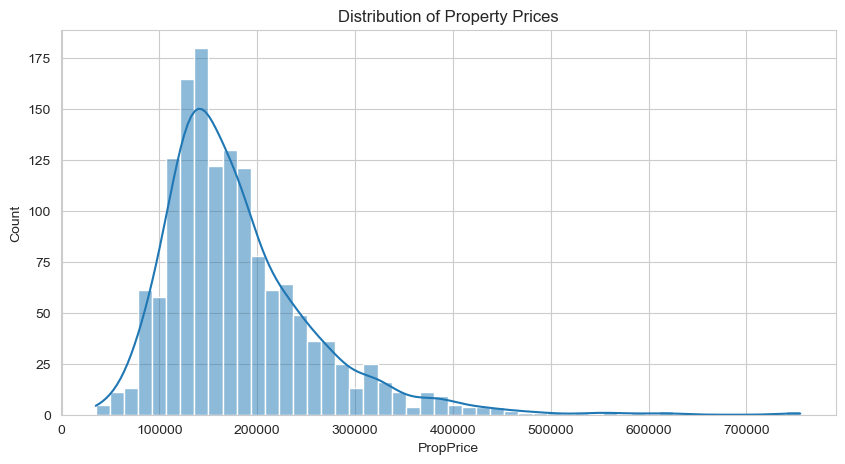

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(property_data['PropPrice'], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.show()

In [63]:
# Average Poperty Price is 180921 /- 
# most number of properties are in the range of 1 lakh to 4 lakh 

In [64]:
                                                          # YearBuilt # 


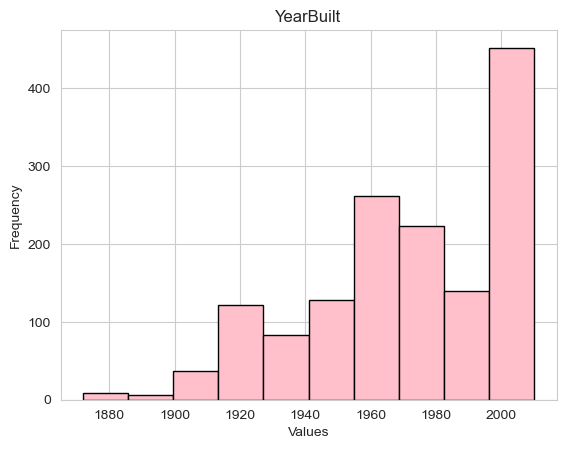

In [65]:
plt.hist(property_data['YearBuilt'], color='pink',edgecolor= 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('YearBuilt')
plt.show()

In [66]:
# most of the properties are built after 2000 

In [67]:
                                           # PropertySize #


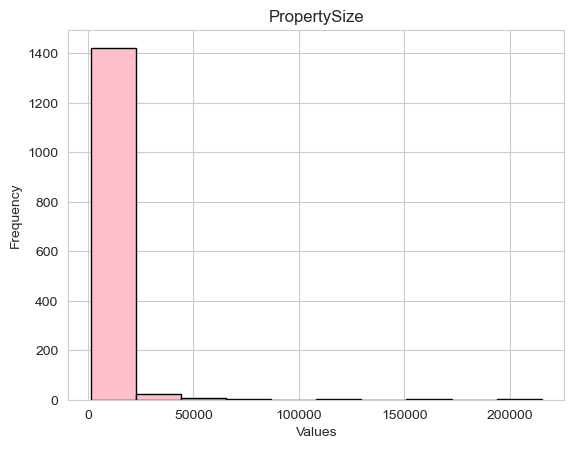

In [68]:
plt.hist(property_data['PropertySize'], color='pink',edgecolor= 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('PropertySize')
plt.show()

In [69]:
 # most of the properties are in the range 0 to 50000 square feet # 

In [70]:
                            
                              #Bivariate Analysis: Relationships Between Variables #

In [71]:
 #Sale Year vs Prop price # 

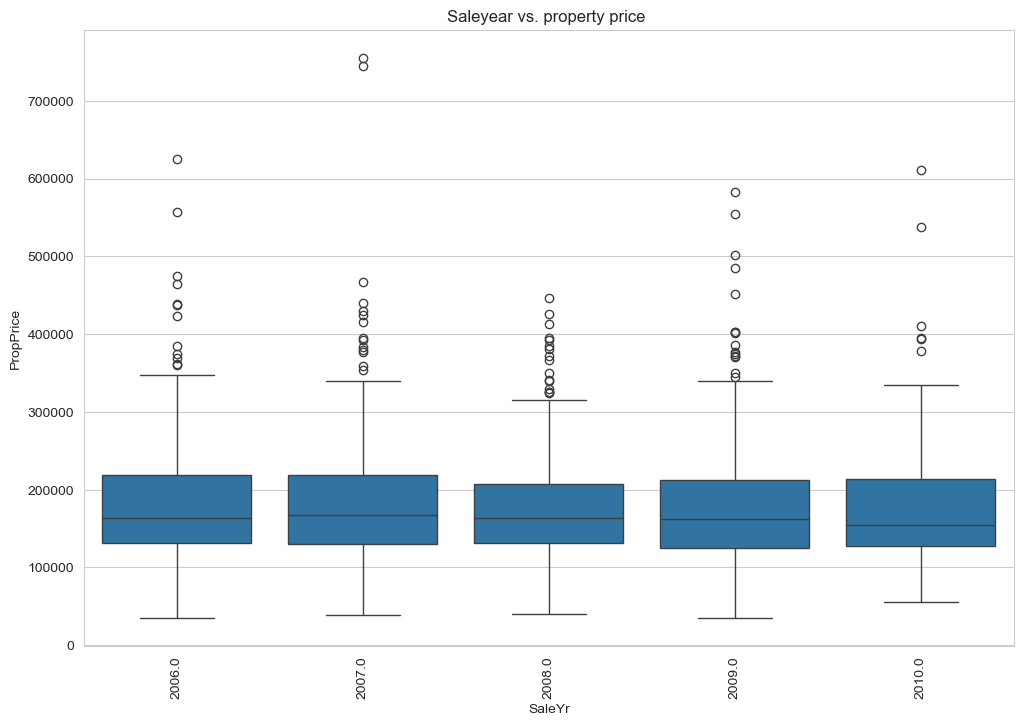

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=property_data['SaleYr'], y=property_data['PropPrice'])
plt.xticks(rotation=90)
plt.title("Saleyear vs. property price ")
plt.xlabel("SaleYr")
plt.ylabel("PropPrice")
plt.show()

In [73]:
  # property size vs property price #

Text(0, 0.5, 'PropPrice')

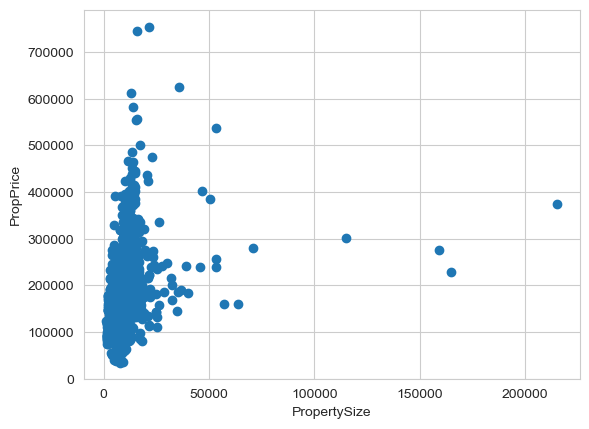

In [74]:
plt.scatter(property_data.PropertySize,property_data.PropPrice)
plt.xlabel('PropertySize')
plt.ylabel('PropPrice')

In [75]:
                                                 # multivariate Analysis # 

In [76]:
# Creating the pair plot #

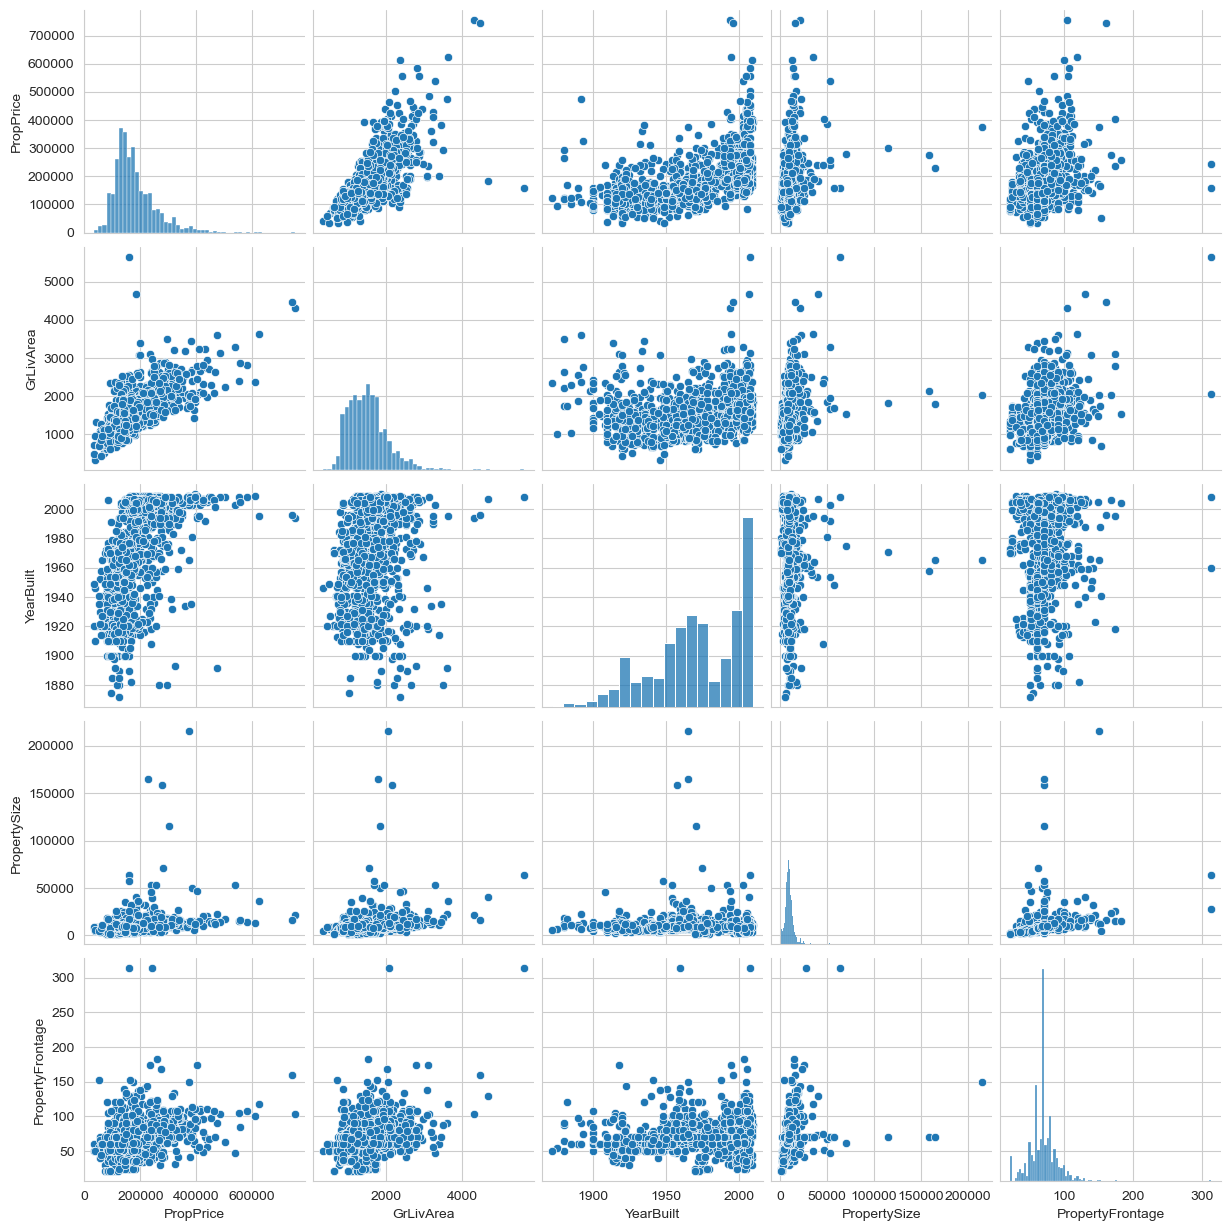

In [77]:
plt.close();
sns.pairplot(property_data[['PropPrice', 'GrLivArea', 'YearBuilt', 'PropertySize', 'PropertyFrontage']])
sns.set_style('whitegrid')
plt.show()


In [78]:
                                                # correlation Analysis #


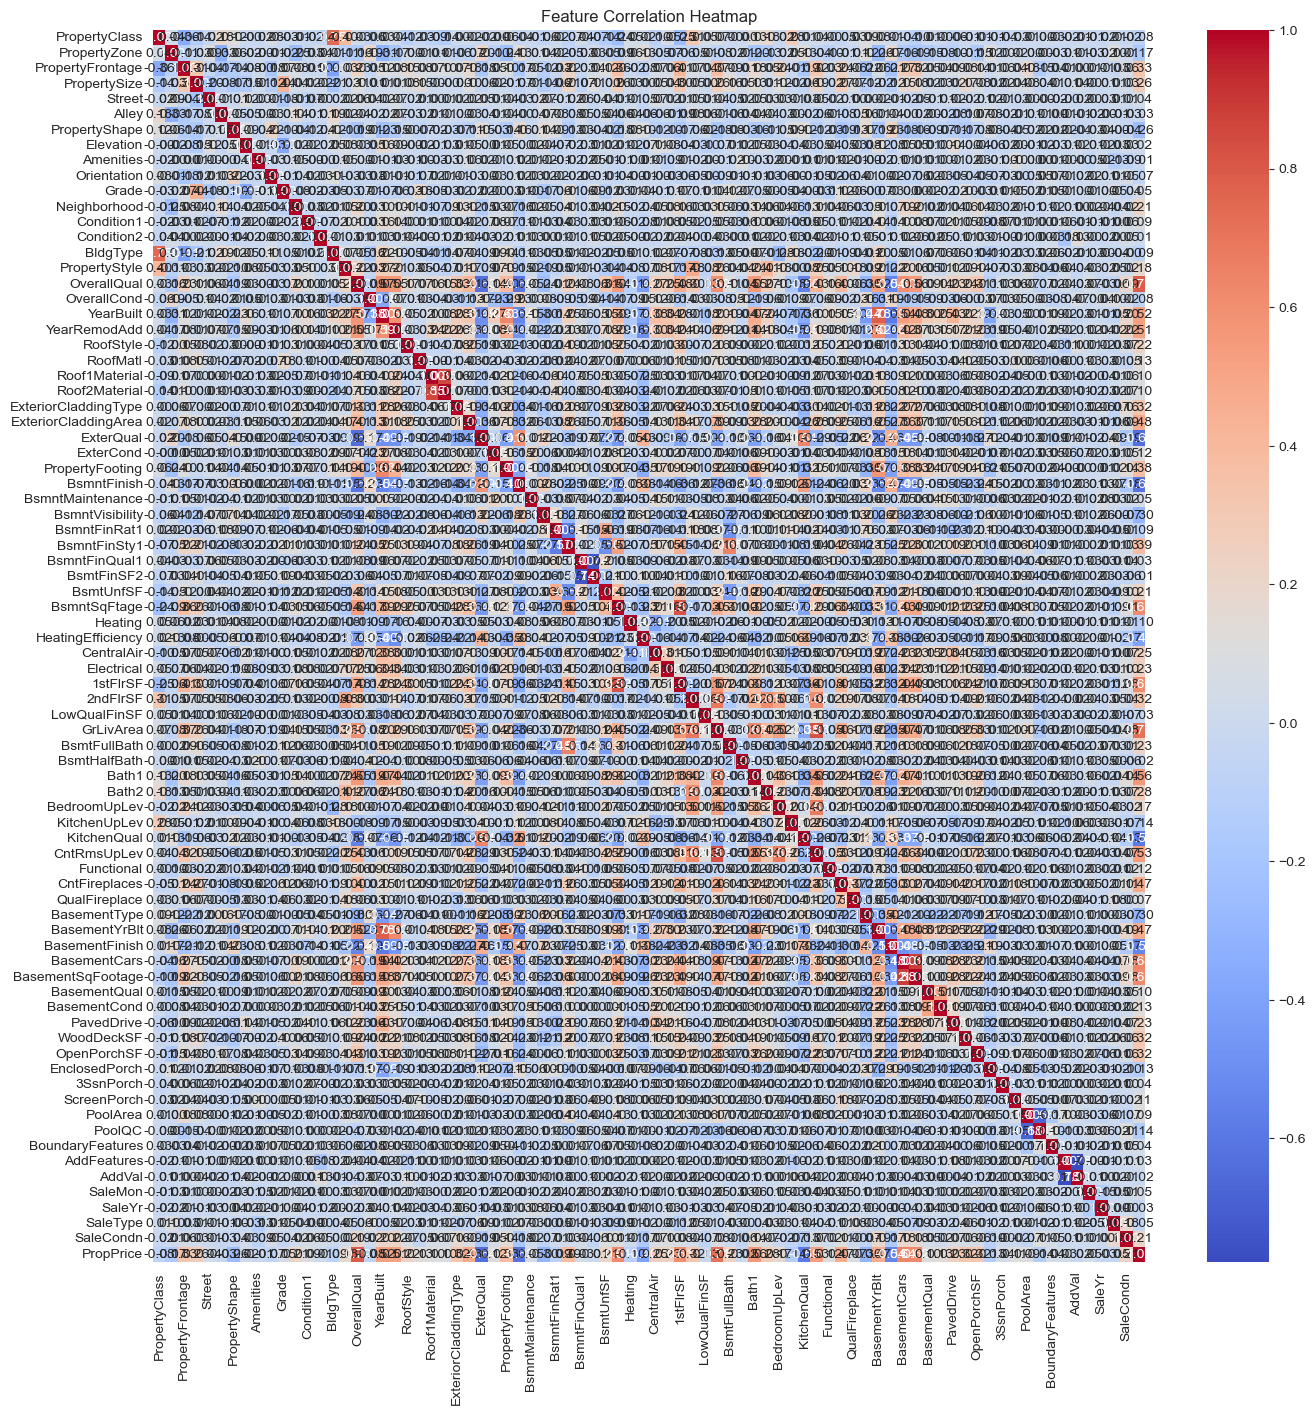

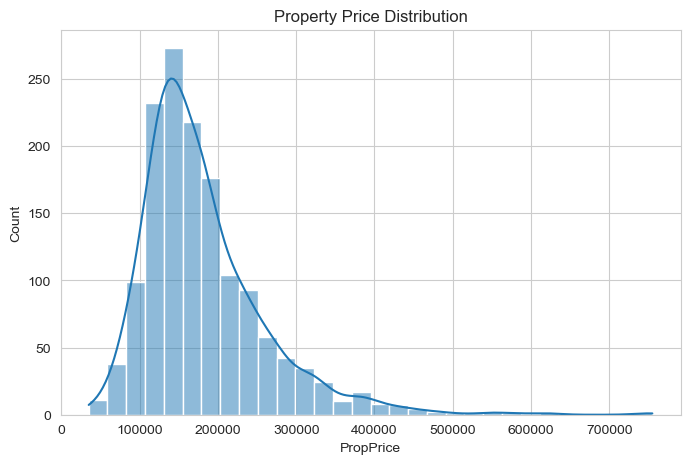

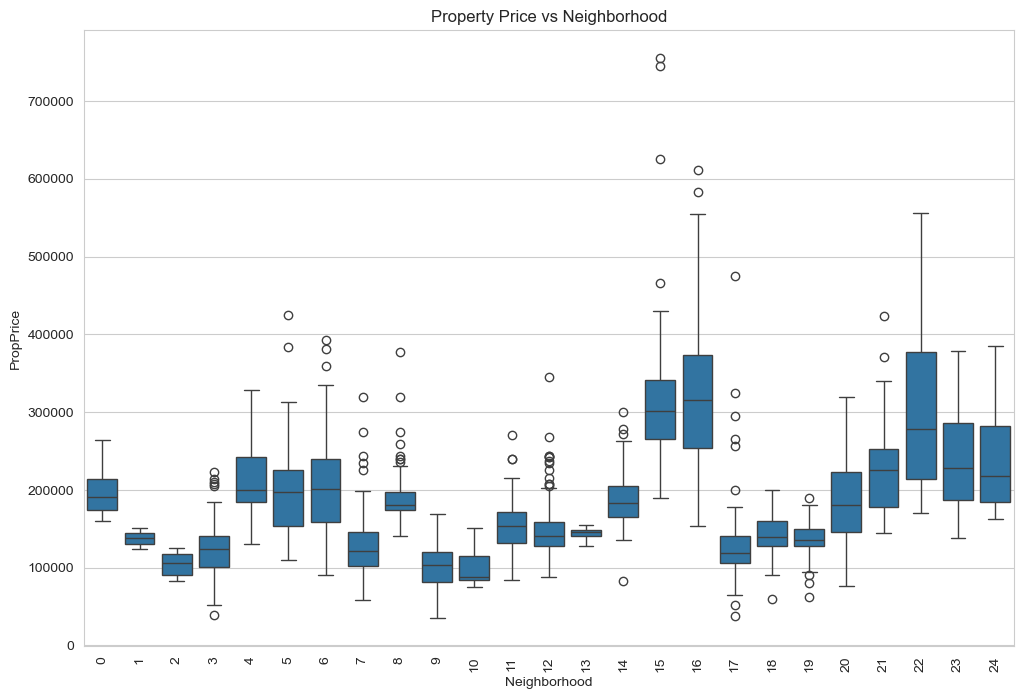

In [79]:
# Check feature correlation
plt.figure(figsize=(16, 16))
sns.heatmap(property_data.corr(), annot=True,fmt='.2f', cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Histogram of target variable (Property Price)
plt.figure(figsize=(8,5))
sns.histplot(property_data["PropPrice"], bins=30, kde=True)
plt.title("Property Price Distribution")
plt.show()

# Boxplot of Price vs Neighborhood
plt.figure(figsize=(12, 8))
sns.boxplot(x="Neighborhood", y="PropPrice", data=property_data)
plt.xticks(rotation=90)
plt.title("Property Price vs Neighborhood")
plt.show()

In [80]:
property_data.columns


Index(['PropertyClass', 'PropertyZone', 'PropertyFrontage', 'PropertySize',
       'Street', 'Alley', 'PropertyShape', 'Elevation', 'Amenities',
       'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt', 'BasementFi

In [81]:
print(property_data.dtypes)

PropertyClass       float64
PropertyZone          int32
PropertyFrontage    float64
PropertySize        float64
Street                int32
                     ...   
SaleMon             float64
SaleYr              float64
SaleType              int32
SaleCondn             int32
PropPrice           float64
Length: 80, dtype: object


In [82]:
                                    # model selection # 

In [83]:
                                   # train test split and feature scaling  # 

In [84]:
X = property_data.drop(columns=['PropPrice'])
y =  property_data['PropPrice'] 

# Splitting dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
lr_model

LinearRegression()

In [87]:
# model evaluation # 

In [88]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("-" * 50)

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Model: Linear Regression
R² Score: 0.84
Mean Absolute Error: 21566.50
Root Mean Squared Error: 35295.91
--------------------------------------------------
Model: Random Forest
R² Score: 0.89
Mean Absolute Error: 17591.66
Root Mean Squared Error: 28730.43
--------------------------------------------------


In [89]:
# Save the trained model #
joblib.dump(rf_model, "property_price_model.pkl")
print("Best model saved successfully!")

Best model saved successfully!


In [90]:
# Load saved model
rf_model = joblib.load("property_price_model.pkl")
lr_model = joblib.load("property_price_model.pkl")


In [91]:
hasattr(rf_model, 'predict')

True

In [92]:
print(rf_model.feature_names_in_)  

['PropertyClass' 'PropertyZone' 'PropertyFrontage' 'PropertySize' 'Street'
 'Alley' 'PropertyShape' 'Elevation' 'Amenities' 'Orientation' 'Grade'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'PropertyStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Roof1Material' 'Roof2Material' 'ExteriorCladdingType'
 'ExteriorCladdingArea' 'ExterQual' 'ExterCond' 'PropertyFooting'
 'BsmntFinish' 'BsmntMaintenance' 'BsmntVisibility' 'BsmntFinRat1'
 'BsmntFinSty1' 'BsmntFinQual1' 'BsmtFinSF2' 'BsmtUnfSF' 'BsmntSqFtage'
 'Heating' 'HeatingEfficiency' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'Bath1' 'Bath2' 'BedroomUpLev' 'KitchenUpLev' 'KitchenQual' 'CntRmsUpLev'
 'Functional' 'CntFireplaces' 'QualFireplace' 'BasementType'
 'BasementYrBlt' 'BasementFinish' 'BasementCars' 'BasementSqFootage'
 'BasementQual' 'BasementCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'Sc

In [93]:
new_data = pd.DataFrame({
    'PropertyClass': [1], 
    'PropertyZone': [2],
    'PropertyFrontage': [50],
    'Street': [1],
    'Alley': [0],
    'PropertyShape': [3],
    'Elevation': [5],
    'Orientation': [2],
    'Grade': [7],
    'Condition1': [1],
    'Condition2': [0],
    'BldgType': [1],
    'PropertyStyle': [2],
    'OverallQual': [8],
    'OverallCond': [5],
    'YearRemodAdd': [2015],
    'RoofStyle': [2],
    'RoofMatl': [3],
    'Roof1Material': [1],
    'Roof2Material': [0],
    'ExteriorCladdingType': [4],
    'ExteriorCladdingArea': [1800],
    'ExterQual': [3],
    'ExterCond': [3],
    'PropertyFooting': [1],
    'BsmntFinish': [2],
    'BsmntMaintenance': [1],
    'BsmntVisibility': [4],
    'BsmntFinRat1': [500],
    'BsmntFinSty1': [1],
    'BsmntFinQual1': [3],
    'BsmtFinSF2': [200],
    'BsmtUnfSF': [300],
    'BsmntSqFtage': [800],
    'Heating': [2],
    'HeatingEfficiency': [3],
    'CentralAir': [1],
    'Electrical': [2],
    'LowQualFinSF': [0],
    'BsmtFullBath': [1],
    'BsmtHalfBath': [0],
    'Bath1': [1],
    'Bath2': [2],
    'BedroomUpLev': [3],
    'KitchenUpLev': [1],
    'KitchenQual': [4],
    'CntRmsUpLev': [6],
    'Functional': [3],
    'CntFireplaces': [1],
    'QualFireplace': [2],
    'BasementType': [2],
    'BasementYrBlt': [2005],
    'BasementFinish': [3],
    'BasementCars': [2],
    'BasementSqFootage': [500],
    'BasementQual': [3],
    'BasementCond': [2],
    'PavedDrive': [1],
    'WoodDeckSF': [300],
    'OpenPorchSF': [50],
    'EnclosedPorch': [0],
    '3SsnPorch': [0],
    'ScreenPorch': [0],
    'PoolArea': [0],
    'PoolQC': [0],
    'BoundaryFeatures': [2],
    'AddFeatures': [1],
    'AddVal': [5000],
    'SaleMon': [4],
    'SaleYr': [2024],
    'SaleType': [1],
    'SaleCondn': [3],
    'PropertySize': [8450.0],
    'Amenities': [1], 
    'Neighborhood': [3],  
    'YearBuilt': [2010],
    '1stFlrSF': [1500],
    '2ndFlrSF': [1200],
    'GrLivArea': [1800]
})

In [94]:

new_data = new_data[rf_model.feature_names_in_]


In [95]:
predicted_price = rf_model.predict(new_data)
print(f"Predicted Property Price: {predicted_price[0]:.2f}")

Predicted Property Price: 236152.34


In [96]:
print(hasattr(rf_model, "predict")) 


True


In [97]:

# hyperprameter tuning #
# Define parameter grid for Random Forest model  #
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train with best model
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [98]:
                                                  # Feature Importance Analysis # 

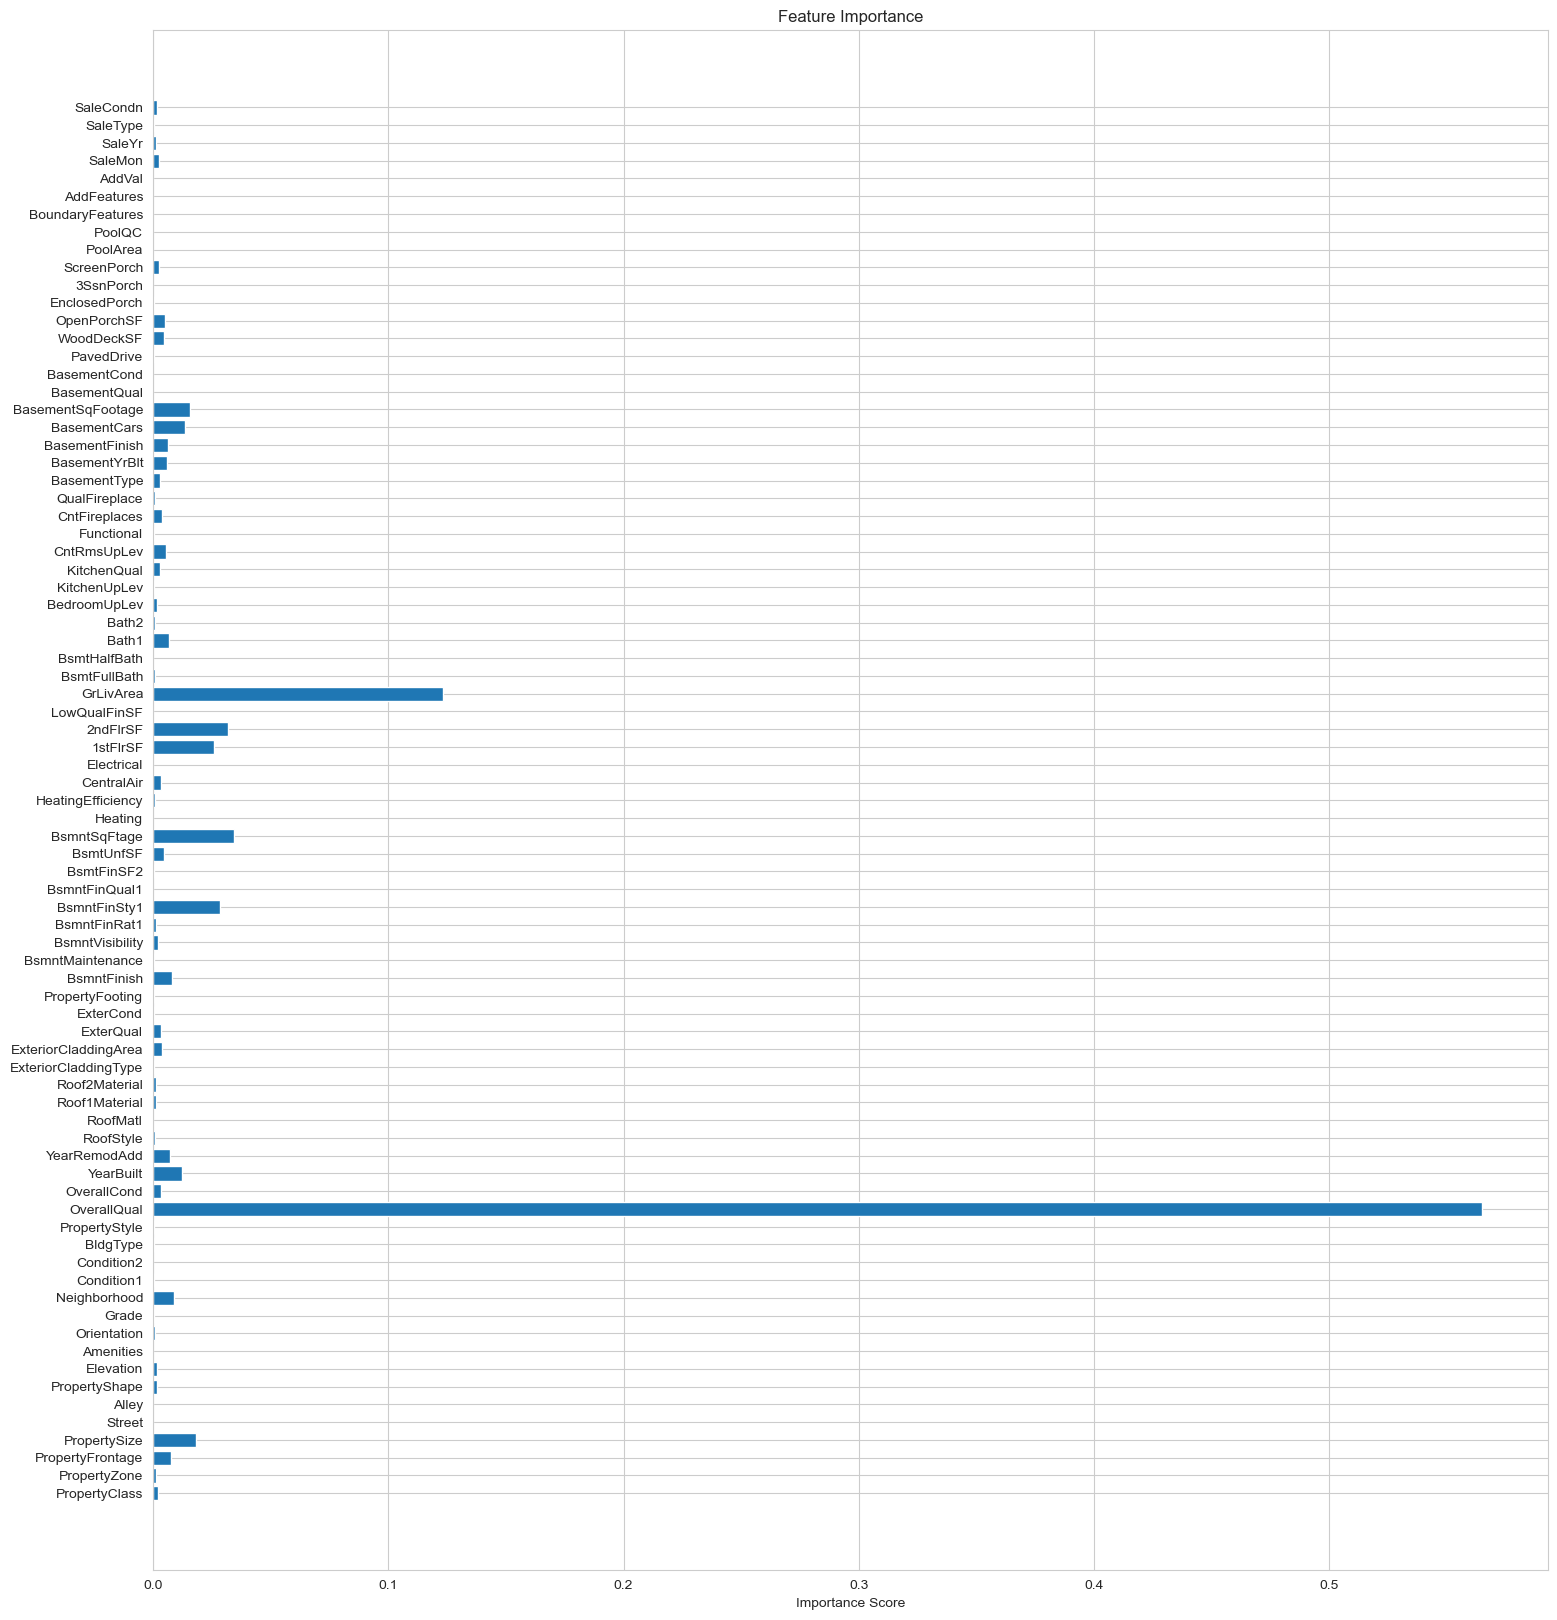

In [99]:

feature_importances = best_rf_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(18,20))
plt.barh(features, feature_importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.show()

In [100]:
 # Feature like Living Area Per Square Feet and Overall Condition and Property Size Has the highest Impact On price of the Property 

In [101]:
# Model Improvement Thorugh XGBOOST

In [102]:


xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=10)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Model: XGBoost
R² Score: 0.90
Mean Absolute Error: 18125.88
Root Mean Squared Error: 28013.46
--------------------------------------------------


In [103]:
# Overall R2 Score Has incresed to 90 percent after usingXGboost #

In [ ]:
# END OF THE PROJECT # 